# Simulation Code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class mmcc:
    """
    intialisation of state vars, statistical counters and events
    """
    def __init__(self, arrival_rate, call_duration, channels, iterations):

        # attributes
        self.arrival_rate = arrival_rate
        self.call_duration = call_duration
        self.channels = channels
        self.iterations = iterations
        self.sim_time = 0   
        self.total_arrivals = 0
        self.time_of_last_event = float("inf")

        # events
        self.events = [float("inf") for _ in range(self.channels + 1)]
        self.events[0] = self.sim_time + np.random.exponential(1 / self.arrival_rate) # exponential of interarrival times
        self.server_status = [ 0 for _ in range (self.channels)]
        
        # statistical counters 
        self.server_usage = [ 0 for _ in range (self.channels)]
        self.blocked_events = 0
        self.all_data = []  

    """
    updates simulation clock and finds the next event
    """
    def timing(self):
        next_event_idx = self.events.index(min(self.events))
        self.time_of_last_event = self.sim_time

        # advance clock to next event
        self.sim_time = self.events[next_event_idx]
        return next_event_idx
    

    """
    handles arrival events
        - schedules next arrival
        - assigns job to server if free otherwise increments block counter
    """
    def arrive(self):
        # schedule the next arrival
        self.total_arrivals += 1
        self.events[0] = self.sim_time + np.random.exponential(1 / self.arrival_rate)

        # find if any server is idle, if so set to busy and schedule departure
        any_idle = False

        for i in range(self.channels):
            if self.server_status[i] == 0:
                self.server_status[i] = 1

                # generate next departure event
                self.events[i + 1] = self.sim_time + np.random.exponential(self.call_duration) 
                any_idle = True
                break

        self.blocked_events += 1 if any_idle == False else 0

    """
    handles departure events by reseting events 
    """
    def departure(self, server_idx):
        # once job is done server becomes idle, (there is no queue to fetch customers from)
        self.server_status[server_idx - 1] = 0
        self.events[server_idx] = float("inf")

    """
    updates statistical counters
        - works by calculating time since past event and incrementing it to a servers usage if busy
    """
    def update_stats(self):
        time_past = self.sim_time - self.time_of_last_event
        for i in range(self.channels):
            self.server_usage[i] += time_past * self.server_status[i]

    """
    returns key metrics we are interested in
        - blocking probability = total blocked events/ total arrivals
    """
    def report(self):
        return self.blocked_events / self.total_arrivals



    """
    Exectutes simulation logic
        - terminates after self.iterations seconds
        - generates the report after simulation completed
    """
    def main(self):

        while self.sim_time < self.iterations:

            next = self.timing()
            self.update_stats()
            

            if next == 0:
                self.arrive()
            else:
                self.departure(next)
                
        self.report()

### Draw figures to depict the performance results for the Blocking Probability and the Server Utilization by changing the value of arrival rate (0.01- 0.1 call/second).

MAXIMUM λ < 0.01 : 0.08


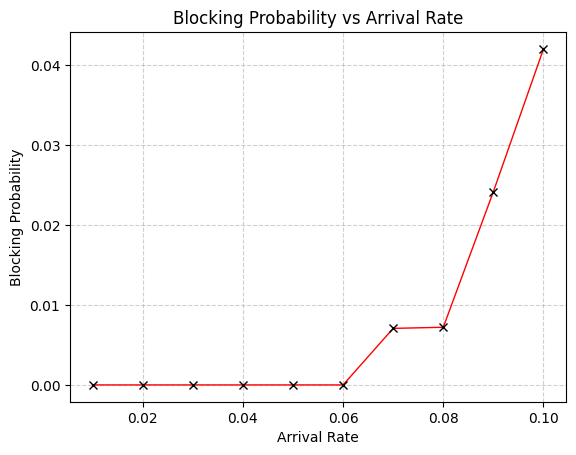

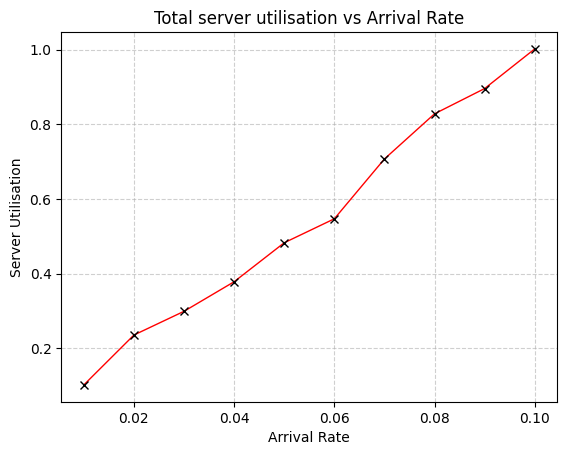

In [18]:
#arrivals = np.linspace(0.01, 1, 100)
#arrivals = np.sort(np.random.uniform(0.01, 0.1, 100))
arrivals = [ (i + 1) / 100 for i in range(10)]

call_duration = 100 # average service time
total_duration = 10000 # num of iterations
channels = 16
results = []
usage = []
mn = float("-inf")

for i in range(len(arrivals)):
    obj = mmcc(arrivals[i], call_duration, channels, total_duration)
    obj.main()
    block_prob = obj.report()
    if block_prob < 0.01: 
        mn = arrivals[i]

    usage.append((sum(obj.server_usage)/total_duration)/10)
    results.append(block_prob)

print(f"MAXIMUM λ < 0.01 : {mn}")
  

def blocking_arrival_plot(data, arrivals, title, x, y):
    plt.figure(1)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.plot(arrivals, data, linestyle='-', marker='x', markerfacecolor='black',  markeredgecolor='black', color='red', linewidth=1)
    plt.grid(visible=True, linestyle='--', alpha=0.6)
    plt.show()

blocking_arrival_plot(results, arrivals, "Blocking Probability vs Arrival Rate", "Arrival Rate", 'Blocking Probability')
blocking_arrival_plot(usage, arrivals, "Total server utilisation vs Arrival Rate", "Arrival Rate", 'Server Utilisation')

### 1.3. 	Find the maximum value for arrival rates so that the Blocking Probability < 0.01.

In [13]:
def trial():

    # generates an array of 100 values from a uniform distribution between 0.01 - 0.1
    arrivals = np.sort(np.random.uniform(0.01, 0.1, 100))

    call_duration = 100 # average service time
    total_duration = 10000 # num of iterations
    channels = 16
    minimum = float("-inf")

    for i in range(len(arrivals)):

        obj = mmcc(arrivals[i], call_duration, channels, total_duration)

        obj.main()
        block_prob = obj.report()
        if block_prob < 0.01: 
            minimum = arrivals[i]

    print(f"MAXIMUM λ < 0.01 : {minimum}")
    return minimum

# runs multiple iterations of trial, in order to account for randomness in the model, providing more results
num_trials = 100
avg = 0
mx = 0
for i in range(num_trials):
    t = trial()
    avg += t
    mx = max(mx, t)

# calculate an averate, but also returning the max seen from all iterations
avg /= num_trials
print(f" MAX SEEN λ : {mx}, AVG MAX: {avg}")
    

MAXIMUM λ < 0.01 : 0.09981666526433645
MAXIMUM λ < 0.01 : 0.09172946826146845
MAXIMUM λ < 0.01 : 0.09578000451863655
MAXIMUM λ < 0.01 : 0.09561021289676433
MAXIMUM λ < 0.01 : 0.09298878444858624
MAXIMUM λ < 0.01 : 0.0989729495940896
MAXIMUM λ < 0.01 : 0.08989340982136879
MAXIMUM λ < 0.01 : 0.09926466813337588
MAXIMUM λ < 0.01 : 0.09936533586424749
MAXIMUM λ < 0.01 : 0.0953125177344887
MAXIMUM λ < 0.01 : 0.0905911709452768
MAXIMUM λ < 0.01 : 0.09936515632843243
MAXIMUM λ < 0.01 : 0.09738507324564886
MAXIMUM λ < 0.01 : 0.09134313448738861
MAXIMUM λ < 0.01 : 0.09773896119222031
MAXIMUM λ < 0.01 : 0.09467090558240361
MAXIMUM λ < 0.01 : 0.09796224414993229
MAXIMUM λ < 0.01 : 0.09444595246342519
MAXIMUM λ < 0.01 : 0.09531827899188482
MAXIMUM λ < 0.01 : 0.090169636903302
MAXIMUM λ < 0.01 : 0.09368572570336224
MAXIMUM λ < 0.01 : 0.09978574774598761
MAXIMUM λ < 0.01 : 0.09554630014873684
MAXIMUM λ < 0.01 : 0.0942292242670733
MAXIMUM λ < 0.01 : 0.09944333305424453
MAXIMUM λ < 0.01 : 0.0912766359

# Analytical models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


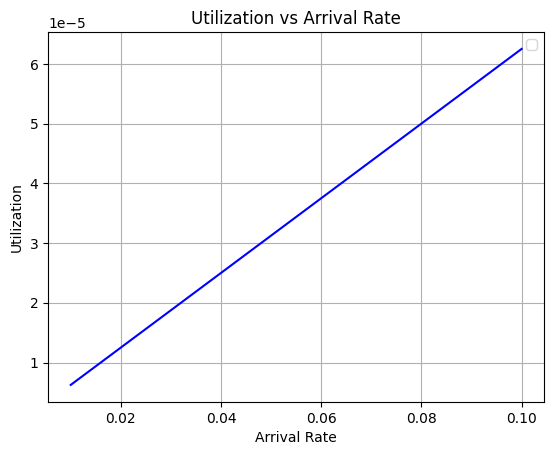

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


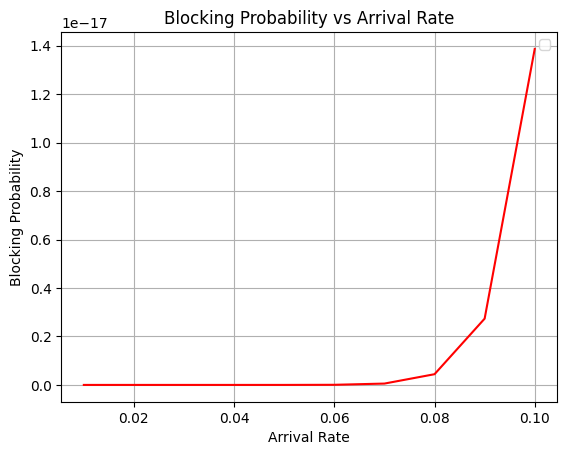

In [20]:

"""
calculates blocking given number of servers
E: traffic intensity
m: Number of servers (C)

"""
def ErlangB(E, m=16):
    InvB = 1.0  
    for j in range(1, m + 1):
        InvB = 1.0 + InvB * (j / E)
    return (1.0 / InvB)

estimated_blocking = []
for lamda in arrivals:
    rho = lamda / channels * call_duration
    b = ErlangB(rho)
    estimated_blocking.append(b)

utils = [] 
for lamda in arrivals:
    estimated_util = lamda / (channels * call_duration)
    utils.append(estimated_util)

# plots
# utilisation plot
plt.figure(1)
plt.plot(arrivals, utils,  color='blue') 
plt.title('Utilization vs Arrival Rate')
plt.xlabel('Arrival Rate')
plt.ylabel('Utilization')
plt.grid(True)
plt.legend()
plt.show()

# blocking probability plot
plt.figure(1)
plt.plot(arrivals, estimated_blocking,  color='red') 
plt.title('Blocking Probability vs Arrival Rate')
plt.xlabel('Arrival Rate')
plt.ylabel('Blocking Probability')
plt.grid(True)
plt.legend()
plt.show()